In [4]:
import PyPDF2
import pandas as pd

# Open the pdf file
pdf1 = PyPDF2.PdfReader('Resources/pubmed.pdf')
pdf2 = PyPDF2.PdfReader('Resources/pubmed2.pdf')
pdfs = [pdf1, pdf2]
# Create a dataframe to store the data from each page
texts=[]
names=[]
count=1
for pdf in pdfs:
    name = f'pdf{count}'
    count+=1
    # Get the number of pages in the pdf file
    num_pages = len(pdf.pages)

    # Iterate over the pages in the pdf file
    for i in range(num_pages):

        # Get the text from the current page
        text = pdf.pages[i].extract_text ()

        # Split the text into sections
        sections = text.split('\n\n')
        texts.append(sections[0])
        names.append(name)

# Add the section to the dataframe
pubmed_df = pd.DataFrame({'doc': names, 'page_text': texts})
pubmed_df

,doc,page_text
0,pdf1,\n \nSince January 2020 Elsevier has created ...
1,pdf1,RESEARCH\nCharacteristics of online pharmacies...
2,pdf1,illegitimate and in violation of U.S. pharmacy...
3,pdf1,"illegal, unsafe, or misleading activities like..."
4,pdf1,The safety characteristics of all online pharm...
5,pdf1,phone number listed and an offer to speak with...
6,pdf1,without a prescription.22Our results demonstra...
7,pdf1,"marketplace. In the meantime, organizations sh..."
8,pdf2,The new england journal of medicinen engl j me...
9,pdf2,"n engl j med 380;12 nejm.org March 21, 2019 11..."


In [9]:
from transformers import pipeline, AutoTokenizer, AutoModelForSeq2SeqLM

# Set up the summarization pipeline
tokenizer = AutoTokenizer.from_pretrained("t5-base", max_input_length = 1024)
model = AutoModelForSeq2SeqLM.from_pretrained("t5-base")
summarizer = pipeline("summarization", model=model, tokenizer=tokenizer)

# Define a function to generate summaries for each section
def generate_summary(text):
    # Generate a summary of the text using the summarization pipelineb
     
    summary = summarizer(text, max_length=80, min_length=25, do_sample=False)[0]['summary_text']
    return summary


In [10]:
pubmed_df

,doc,page_text
0,pdf1,\n \nSince January 2020 Elsevier has created ...
1,pdf1,RESEARCH\nCharacteristics of online pharmacies...
2,pdf1,illegitimate and in violation of U.S. pharmacy...
3,pdf1,"illegal, unsafe, or misleading activities like..."
4,pdf1,The safety characteristics of all online pharm...
5,pdf1,phone number listed and an offer to speak with...
6,pdf1,without a prescription.22Our results demonstra...
7,pdf1,"marketplace. In the meantime, organizations sh..."
8,pdf2,The new england journal of medicinen engl j me...
9,pdf2,"n engl j med 380;12 nejm.org March 21, 2019 11..."


In [11]:
pubmed_df['Summary'] = pubmed_df['page_text'].apply(generate_summary)

C:\Users\Athen\anaconda3\envs\dev\lib\site-packages\transformers\generation\utils.py:1202: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  "You have modified the pretrained model configuration to control generation. This is a"
Token indices sequence length is longer than the specified maximum sequence length for this model (1104 > 512). Running this sequence through the model will result in indexing errors


In [12]:
pubmed_df

,doc,page_text,Summary
0,pdf1,\n \nSince January 2020 Elsevier has created ...,since January 2020 Elsevier has created a COVI...
1,pdf1,RESEARCH\nCharacteristics of online pharmacies...,of the 62 online pharmacies found to sell Adde...
2,pdf1,illegitimate and in violation of U.S. pharmacy...,96% of the accessible online pharmacies are il...
3,pdf1,"illegal, unsafe, or misleading activities like...","traf fic to rogue, unclassi fied, and legitima..."
4,pdf1,The safety characteristics of all online pharm...,rogue and unclassi fied pharmacies offered som...
5,pdf1,phone number listed and an offer to speak with...,of 62 online pharmacies claiming to sell Adder...
6,pdf1,without a prescription.22Our results demonstra...,research shows that the no- prescription price...
7,pdf1,"marketplace. In the meantime, organizations sh...",a review of the literature on the use and misu...
8,pdf2,The new england journal of medicinen engl j me...,"in 2007, the Food and Drug Administration mand..."
9,pdf2,"n engl j med 380;12 nejm.org March 21, 2019 11...",the most effective treatments are methylphenid...


In [13]:
from transformers import pipeline
model_path = "LiYuan/amazon-review-sentiment-analysis"
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)


In [14]:
# Define a function to analyze sentiment using the provided model and calculate the average score
def analyze_sentiment(text):
    # Truncate or split text to fit within the model's maximum sequence length
    max_sequence_length = 512  # Adjust based on model's limit
    text_segments = [text[i:i + max_sequence_length] for i in range(0, len(text), max_sequence_length)]
    
    # Analyze sentiment for each text segment and collect the scores
    sentiment_scores = [sentiment_task(segment)[0]['score'] for segment in text_segments]
    
    # Calculate the average score
    if sentiment_scores:
        average_score = sum(sentiment_scores) / len(sentiment_scores)
    else:
        average_score = None  # Set a default value if there are no scores
    
    return average_score

In [17]:
adderall = pd.read_csv("resources/adderall.csv")
adderall

,Age,Condition,Date,Drug,Sex,Reviews
0,,Attention Deficit Disorder with Hyperactivity,2023-04-29,adderall xr,,No Script or health Insurance needed to place ...
1,25-34,Attention Deficit Disorder with Hyperactivity,2023-01-07,adderall xr,Female,I realize my previous comment was more about m...
2,25-34,Other,2023-01-30,adderall xr,Female,I realize my previous comment was more about m...
3,25-34,Attention Deficit Disorder with Hyperactivity,2023-03-08,adderall xr,Female,"My entire life I felt like I was different, ne..."
4,25-34,Attention Deficit Disorder with Hyperactivity,2023-06-09,adderall xr,Female,Been taking it since I was 10. So over 20 year...
...,...,...,...,...,...,...
505,25-34,Attention Deficit Disorder with Hyperactivity,2023-04-11,adderall xr,Female,The only problem I had: it would quit working ...
506,19-24,Attention Deficit Disorder with Hyperactivity,2023-01-20,adderall xr,Male,"I have a urine test in a few days, and I wante..."
507,45-54,Attention Deficit Disorder with Hyperactivity,2023-04-29,adderall xr,Female,"I have ADD, not ADHD. I noticed a difference ..."
508,35-44,Attention Deficit Disorder with Hyperactivity,2023-05-03,adderall xr,Female,"I can sleep at night, but I do't need naps dur..."


In [18]:
adderall['score'] = adderall['Reviews'].apply(analyze_sentiment)

In [26]:
# Rename 'Age' values '3-6' and '7-12' with leading zeros to simplify ordering in later plotting
adderall['Age'] = adderall['Age'].str.replace('3-6', '03-06').str.replace('7-12', '07-12')

In [27]:
adderall_agesex = adderall.groupby(['Age', 'Sex'])['score'].mean().reset_index()

In [28]:
adderall_male = adderall_agesex[adderall_agesex['Sex']=='Male']
adderall_female = adderall_agesex[adderall_agesex['Sex']=='Female']

<function matplotlib.pyplot.show(close=None, block=None)>

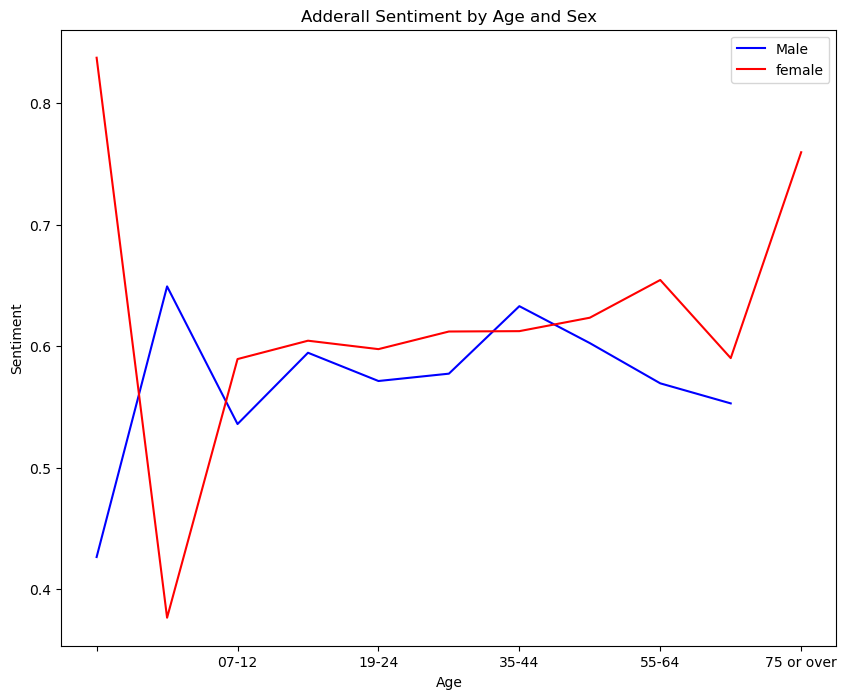

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
adderall_male.plot.line(x='Age', y="score", ylabel='Sentiment', c='blue', label='Male', ax=ax, title='Adderall Sentiment by Age and Sex')

adderall_female.plot.line(x='Age', y="score", ylabel='Sentiment', c='red', label='female', ax=ax)

plt.show


just based on what we can see here, i notice a few interesting observations. First, women ages 70 and up really love adderall, which was surprising to me. The sentiment seems to be mostly neutral for both men and women in the age raange of 12-40, gradually getting more favorable as they get older. Men seem to care for it less as they get older, likely because they have tamed out a bit. However, another interesting note is that young boys ages 8-9 seem to really love adderall. Assuming these kids aren't the ones writing the reviews, and it's written by their parents, I imagine that it is mothers who love adderall for boys that age. I do also wonder why it might be so inverse for girls that age though, their parents really seem to hate adderall for girls that age. My recommendation for Adderall is a total rebrand, focus on the younger boys and older women! 